### Assignment 7 - Dataset 2

Find two datasets each of which has two variables which we’ll call x and y, but they can have any names.

You should have a suspicion or intuition that in each dataset, variable y is linearly dependent on variable x.

• For each dataset:

o Create a scatter plot of the data.

o Draw the least-squares regression line through the scatter plot.

o Calculate and print the coefficient of determination and the correlation coefficient.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

###### Super Store dataset is selected from data.world as the second dataset

The intuition is that as more products are purchased & sales increases, customers are willing to pay more shipment cost 

In [2]:
superstore=pd.read_excel('GlobalSuperstore.xlsx')

In [3]:
#Viewing the data
superstore.head()

,category,city,country,customer_id,customer_name,discount,market,order_date,order_id,order_priority,...,region,row_id,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year
0,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,2018-09-29T00:00:00,CA-2011-146969,3) High,...,West,32440,6,Consumer,2018-10-03T00:00:00,Standard Class,1.32,California,Paper,2018.0
1,Office Supplies,Los Angeles,United States,LH-171554,Logan Haushalter,0,US,2019-06-19T00:00:00,CA-2012-121965,2) Medium,...,West,35746,6,Consumer,2019-06-23T00:00:00,Standard Class,0.52,California,Paper,2019.0
2,Office Supplies,Los Angeles,United States,CC-122204,Chris Cortes,0,US,2020-03-29T00:00:00,CA-2013-131380,4) Critical,...,West,38455,6,Consumer,2020-04-01T00:00:00,Second Class,1.82,California,Paper,2020.0
3,Office Supplies,Los Angeles,United States,TT-210704,Ted Trevino,0,US,2020-05-12T00:00:00,CA-2013-162733,2) Medium,...,West,31457,6,Consumer,2020-05-13T00:00:00,First Class,0.41,California,Paper,2020.0
4,Office Supplies,Los Angeles,United States,CC-123704,Christopher Conant,0,US,2020-07-08T00:00:00,CA-2013-135265,4) Critical,...,West,35281,49,Consumer,2020-07-10T00:00:00,Second Class,10.36,California,Paper,2020.0


###### Create a scatter plot of the data.

Text(0, 0.5, 'Sleep Score')

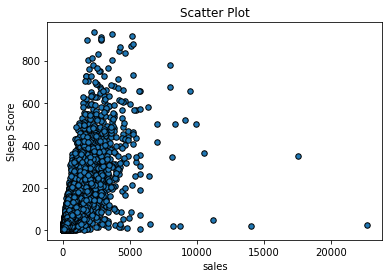

In [4]:
plt.scatter(superstore.sales,superstore.shipping_cost,edgecolor ="black",s = 30,linewidths = 1)
plt.title('Scatter Plot')
plt.xlabel('sales')
plt.ylabel('Sleep Score')

In [5]:
X=superstore['sales'].values
Y=superstore['shipping_cost'].values

In [6]:
# Method 1: Calculating correlation coefficient using formula for it
X_mu=sum(X)/len(X)
Y_mu=sum(Y)/len(Y)
X_diff=0
Y_diff=0
X_Y_diff=0

for i in range(0,superstore.shape[0]):
    X_diff+=(X[i]-X_mu)**2
    Y_diff+=(Y[i]-Y_mu)**2
    X_Y_diff+=(X[i]-X_mu)*(Y[i]-Y_mu)
r=X_Y_diff/(((X_diff)**(1/2))*((Y_diff)**(1/2)))
print(f'Correlation: {round(r,2)}')

Correlation: 0.77


In [7]:
# Method 2: Calculating correlation coefficient using python function
correlation_matrix=np.corrcoef(superstore.sales,superstore.shipping_cost)
# correlation_matrix

correlation=correlation_matrix[0,1]
print(f'Correlation: {round(correlation,2)}')

Correlation: 0.77


In [8]:
#Coefficient of determination
r_square=correlation**2
print(f'Co-efficient of Determination: {round(r_square,2)}')

Co-efficient of Determination: 0.59


###### Draw the least-squares regression line through the scatter plot

In [9]:
def calculate_slope_intercept(x_values, y_values):
    """
    Calculate the slope and intercept of a regression line.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the slope and y-intercept of the line.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = (np.mean(y) - m*np.mean(x))
    
    return m, b  # slope and intercept

def show_least_squares_line(title, x_label, y_label, 
                            x_values, y_values):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    # First show the scatter plot.
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(x_values, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f'Slope: m={round(m,2)}, Intercept: c={round(b,2)}, Equation:  y={round(m,2)}x + {round(b,2)}' )
    plt.show()

Slope: m=0.09, Intercept: c=4.13, Equation:  y=0.09x + 4.13


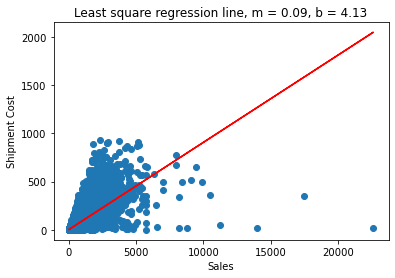

In [10]:
calculate_slope_intercept(X,Y)
show_least_squares_line('Least square regression line','Sales','Shipment Cost',X,Y)

###### Takeaway

1) There's a strong positive correlation between sales and shipment cost (~0.8)

2) How strong the fit is determined by coefficient of determination which is ~0.6